## 1. 경사하강법의 종류
* local optima에서 빠져나와야 함..
-> 

1) 전체-배치 경사하강법(Full-Batch Gradient Decent)
2) 확률적 경사하강법(Stochastic Gradient Decent)
3) Mini-Batch Gradient Decent

In [1]:
class LinearRegressionGD(object):
    def __init__(self, fit_intercept=True, copy_X=True,
                 eta0=0.001, epochs=1000, batch_size = 1,
                 weight_decay=0.9, shuffle=True):
        self.fit_intercept = fit_intercept
        self.copy_X = copy_X
        self._eta0 = eta0 
        self._epochs = epochs
        
        self._cost_history = []
        
        self._coef = None
        self._intercept = None
        self._new_X = None
        self._w_history = None
        self._weight_decay = weight_decay
        self._batch_size = batch_size
        self._is_SGD = shuffle
        
    def gradient(self, X, y, theta):
        return X.T.dot(self.hypothesis_function(X, theta)-y) / len(X)

    def fit(self, X, y):
        self._new_X = np.array(X) # X 데이터 할당
        y = y.reshape(-1, 1)
    
        if self.fit_intercept: # intercept 추가 여부
            #1로만 구성된 상수항을 모든 데이터에 추가
            intercept_vector = np.ones([len(self._new_X), 1])
            self._new_X = np.concatenate(
                (intercept_vector, self._new_X), axis=1)
        
        theta_init = np.random.normal(0, 1, self._new_X.shape[1])
        #weight 값 초기화
        self._w_history = [theta_init]
        self_cost_history = [self.cost(
        self.hypothesis_function(self._new_X, theta_init), y)]
    
        theta = theta_init
    
        for epoch in range(self._epochs):
            X_copy = np.copy(self._new_X)
        
            if self._is_SGD:
                np.random.shuffle(X_copy)
            
            batch = len(X_copy) // self._batch_size
        
            for batch_count in range(batch):
                X_batch = np.copy(
                    X_copy[batch_count * self._batch_size: (batch_count+1) & self._batch_size])
            
                gradient = self.gradient(X_batch, y, theta).flatten()
                theta = theta - self._eta0 * gradient
            
            if epoch % 100 == 0:
                self._w_history.append(theta)
                cost = self.cost(
                    self.hypothesis_function(self._new_X, theta), y)
                self._cost_history.append(cost)
            self._eta0 = self._eta0 * self._weight_decay
            
        if self.fit_intercept:
            self._intercept = theta[0]
            self._coef = theta[1:]
        else:
            self._coef = theta
            
    def cost(self, h, y):
        return 1/(2*len(y)) * np.sum((h-y).flatten() ** 2)

    def hypothesis_function(self, X, theta):
        return X.dot(theta).reshape(-1, 1)

    def gradient(self, X, y, theta):
        return X.T.dot(self.hypothesis_function(X, theta)-y) / len(X)

    def fit(self, X, y):
        self._new_X = np.array(X)
        
        y = y.reshape(-1, 1)
        
        if self.fit_intercept:
            intercept_vector = np.ones([len(self._new_X), 1])
            self._new_X = np.concatenate(
                (intercept_vector, self._new_X), axis=1)
            
        theta_init = np.random.normal(0, 1, self._new_X.shape[1])
        self._w_history = [theta_init]
        self._cost_history = [self.cost(
            self.hypothesis_function(self._new_X, theta_init), y)]
        
        theta = theta_init
        
        for epoch in range(self._epochs):
            gradient = self.gradient(self._new_X, y, theta).flatten()
            theta = theta - self._eta0 * gradient
            
            if epoch % 100 == 0:
                self._w_history.append(theta)
                cost = self.cost(
                    self.hypothesis_function(self._new_X, theta), y)
                self._cost_history.append(cost)
            self._eta0 = self._eta0 * self._weight_decay
            
        if self.fit_intercept:
            self._intercept = theta[0]
            self._coef = theta[1:]
        else:
            self._coef = theta
            
    def predict(self, X):
        test_X = np.array(X)
        
        if self.fit_intercept:
            intercept_vector = np.ones([len(test_X), 1])
            test_X = np.concatenate(
                (intercept_vector, test_X), axis=1)
            weights = np.concatenate(([self._intercept], self._coef), axis=0)
        else:
            weights = self._coef
            
        return test_X.dot(weights)
    
    @property
    def coef(self):
        return self._coef
    
    @property
    def intercept(self):
        return self._intercept
    
    @property
    def weights_history(self):
        return np.array(self._w_history)
    
    @property
    def cost_history(self):
        return self._cost_history

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('../datasets/ch08/train.csv')

In [3]:
X = df['x'].values.reshape(-1, 1)
y = df['y'].values

In [4]:
X

array([[ 24],
       [ 50],
       [ 15],
       [ 38],
       [ 87],
       [ 36],
       [ 12],
       [ 81],
       [ 25],
       [  5],
       [ 16],
       [ 16],
       [ 24],
       [ 39],
       [ 54],
       [ 60],
       [ 26],
       [ 73],
       [ 29],
       [ 31],
       [ 68],
       [ 87],
       [ 58],
       [ 54],
       [ 84],
       [ 58],
       [ 49],
       [ 20],
       [ 90],
       [ 48],
       [  4],
       [ 25],
       [ 42],
       [  0],
       [ 60],
       [ 93],
       [ 39],
       [  7],
       [ 21],
       [ 68],
       [ 84],
       [  0],
       [ 58],
       [ 19],
       [ 36],
       [ 19],
       [ 59],
       [ 51],
       [ 19],
       [ 33],
       [ 85],
       [ 44],
       [  5],
       [ 59],
       [ 14],
       [  9],
       [ 75],
       [ 69],
       [ 10],
       [ 17],
       [ 58],
       [ 74],
       [ 21],
       [ 51],
       [ 19],
       [ 50],
       [ 24],
       [  0],
       [ 12],
       [ 75],
       [ 21],
      

In [5]:
gd_lr = LinearRegressionGD(eta0=0.001, epochs=10000, batch_size=1, shuffle=False)
bgd_lr = LinearRegressionGD(eta0=0.001, epochs=10000, batch_size=len(X), shuffle=False)
sgd_lr = LinearRegressionGD(eta0=0.001, epochs=10000, batch_size=1, shuffle=True)
msgd_lr = LinearRegressionGD(eta0=0.001, epochs=10000, batch_size=100, shuffle=True)

In [6]:
gd_lr.fit(X, y)

In [7]:
bgd_lr.fit(X, y)
sgd_lr.fit(X, y)
msgd_lr.fit(X, y)

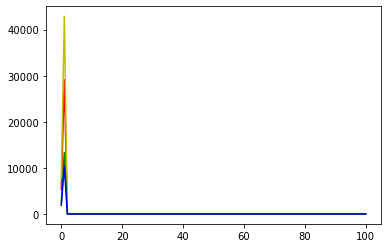

In [8]:
import matplotlib.pyplot as plt

plt.plot(range(len(gd_lr.cost_history)), gd_lr.cost_history, c='r')
plt.plot(range(len(bgd_lr.cost_history)), bgd_lr.cost_history, c='y')
plt.plot(range(len(sgd_lr.cost_history)), sgd_lr.cost_history, c='g')
plt.plot(range(len(msgd_lr.cost_history)), msgd_lr.cost_history, c='b')

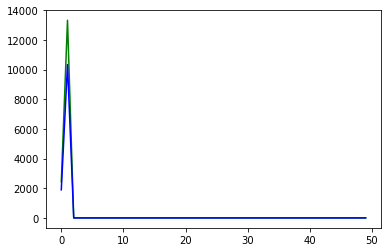

In [9]:
plt.plot(range(50), sgd_lr.cost_history[:50], c='g')
plt.plot(range(50), msgd_lr.cost_history[:50], c='b')